### Проверка работоспособности и качества пайплайна

Здесь мы еще не запускаем никакое API, а загружаем модель (pipeline) напрямую и проверяем на отложенной (тестовой) выборке

In [10]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import dill
dill._dill._reverse_typemap['ClassType'] = type

In [11]:
TEST_DATASET_PATH = 'test_test.csv'
X_test = pd.read_csv(TEST_DATASET_PATH)
X_test.head(3)

,Unnamed: 0,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_2,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByDistrict,MedPriceByFloorYear
0,0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,...,1,0,0,0,0,76.0,0,0,171145.169069,189145.451091
1,1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,...,0,0,0,0,0,164.0,0,1,131107.271962,178912.369081
2,2,2.0,59.463678,52.931276,9.0,19,19.0,1977,0.211401,1,...,1,0,0,0,1,580.0,0,1,165993.292450,171739.199220


In [12]:
X_test.head(3)

,Unnamed: 0,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_2,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByDistrict,MedPriceByFloorYear
0,0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,...,1,0,0,0,0,76.0,0,0,171145.169069,189145.451091
1,1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,...,0,0,0,0,0,164.0,0,1,131107.271962,178912.369081
2,2,2.0,59.463678,52.931276,9.0,19,19.0,1977,0.211401,1,...,1,0,0,0,1,580.0,0,1,165993.292450,171739.199220


In [13]:
with open('model_RF.dill', 'rb') as in_strm:
    pipeline = dill.load(in_strm)

In [14]:
predictions = pipeline.predict(X_test)
predictions

array([161554.1814071 , 122267.72392485, 140689.14759469, ...,
       146668.83659499, 187511.31285939, 221210.94463924])

In [15]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [16]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,161554.181407
1,5925,122267.723925
2,960,140689.147595
3,3848,139448.531842
4,746,188621.014403


In [17]:
submit.to_csv('rf_submit_test.csv', index=False)

In [18]:
y_test = pd.read_csv('rf_submit.csv')
y_test.head(3)

,Id,Price
0,4567,157107.817656
1,5925,124829.629331
2,960,138447.383444


In [19]:
target_name = 'Price'
y_test = y_test[target_name]

In [20]:
y_test

0       157107.817656
1       124829.629331
2       138447.383444
3       138511.224152
4       190320.199709
            ...      
4995    180176.507415
4996    413913.325767
4997    147378.843795
4998    186955.378759
4999    233072.937991
Name: Price, Length: 5000, dtype: float64

In [21]:

X_train, X_valid, y_train, y_valid = train_test_split(X_test, y_test, test_size=0.33, shuffle=True, random_state=21)

In [22]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.989
Test R2:	0.989


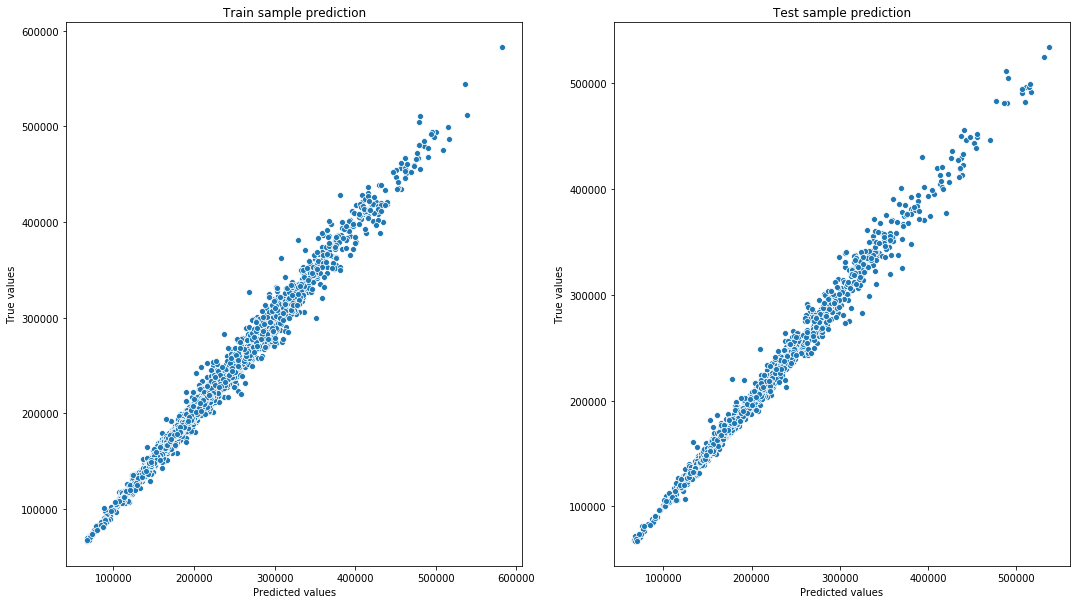

In [23]:
y_train_preds = pipeline.predict(X_train)
y_test_preds = pipeline.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)